In [5]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FormatStrFormatter

In [48]:
# Set result_dir_path
config={
    "n_sim":10,
    "drug_emc_dir_path":"drug_emc_res",
    "drug_rand_sampling_dir_path":"drug_rand_sampling_res",
    
    "stroke_emc_dir_path":"stroke_emc_res",
    "stroke_rand_sampling_dir_path":"stroke_rand_sampling_res",
}

In [49]:
# Drug classficiation output

# Load EMC results
drug_n_sim_accuracy_ls, drug_n_sim_precision_ls, drug_n_sim_recall_ls = [],[],[]

for i in range(config['n_sim']):
    drug_n_sim_accuracy_ls.append(np.load(f"{config['drug_emc_dir_path']}/{i}_sim_emc_accuracy.npy"))
    drug_n_sim_precision_ls.append(np.load(f"{config['drug_emc_dir_path']}/{i}_sim_emc_precision.npy"))
    drug_n_sim_recall_ls.append(np.load(f"{config['drug_emc_dir_path']}/{i}_sim_emc_recall.npy"))


# Load Random Sampling results
drug_n_sim_accuracy_random_ls, drug_n_sim_precision_random_ls, drug_n_sim_recall_random_ls = [],[],[]

for i in range(config['n_sim']):
    drug_n_sim_accuracy_random_ls.append(np.load(f"{config['drug_rand_sampling_dir_path']}/{i}_sim_rand_sample_accuracy.npy"))
    drug_n_sim_precision_random_ls.append(np.load(f"{config['drug_rand_sampling_dir_path']}/{i}_sim_rand_sample_precision.npy"))
    drug_n_sim_recall_random_ls.append(np.load(f"{config['drug_rand_sampling_dir_path']}/{i}_sim_rand_sample_recall.npy"))

drug_emc_avg_acc_arr = np.sum(drug_n_sim_accuracy_ls,axis=0) / len(drug_n_sim_accuracy_ls)
drug_emc_avg_prec_arr = np.sum(drug_n_sim_precision_ls,axis=0) / len(drug_n_sim_precision_ls)
drug_emc_avg_recall_arr = np.sum(drug_n_sim_recall_ls,axis=0) / len(drug_n_sim_recall_ls)

drug_rand_avg_acc_arr = np.sum(drug_n_sim_accuracy_random_ls,axis=0) / len(drug_n_sim_accuracy_random_ls)
drug_rand_avg_prec_arr = np.sum(drug_n_sim_precision_random_ls,axis=0) / len(drug_n_sim_precision_random_ls)
drug_rand_avg_recall_arr = np.sum(drug_n_sim_recall_random_ls,axis=0) / len(drug_n_sim_recall_random_ls)

In [50]:
# Stroke classficiation output

# Load EMC results
stroke_n_sim_accuracy_ls, stroke_n_sim_precision_ls, stroke_n_sim_recall_ls = [],[],[]

for i in range(config['n_sim']):
    stroke_n_sim_accuracy_ls.append(np.load(f"{config['stroke_emc_dir_path']}/{i}_sim_emc_accuracy.npy"))
    stroke_n_sim_precision_ls.append(np.load(f"{config['stroke_emc_dir_path']}/{i}_sim_emc_precision.npy"))
    stroke_n_sim_recall_ls.append(np.load(f"{config['stroke_emc_dir_path']}/{i}_sim_emc_recall.npy"))


# Load Random Sampling results
stroke_n_sim_accuracy_random_ls, stroke_n_sim_precision_random_ls, stroke_n_sim_recall_random_ls = [],[],[]

for i in range(config['n_sim']):
    stroke_n_sim_accuracy_random_ls.append(np.load(f"{config['stroke_rand_sampling_dir_path']}/{i}_sim_rand_sample_accuracy.npy"))
    stroke_n_sim_precision_random_ls.append(np.load(f"{config['stroke_rand_sampling_dir_path']}/{i}_sim_rand_sample_precision.npy"))
    stroke_n_sim_recall_random_ls.append(np.load(f"{config['stroke_rand_sampling_dir_path']}/{i}_sim_rand_sample_recall.npy"))

stroke_emc_avg_acc_arr = np.sum(stroke_n_sim_accuracy_ls,axis=0) / len(stroke_n_sim_accuracy_ls)
stroke_emc_avg_prec_arr = np.sum(stroke_n_sim_precision_ls,axis=0) / len(stroke_n_sim_precision_ls)
stroke_emc_avg_recall_arr = np.sum(stroke_n_sim_recall_ls,axis=0) / len(stroke_n_sim_recall_ls)

stroke_rand_avg_acc_arr = np.sum(stroke_n_sim_accuracy_random_ls,axis=0) / len(stroke_n_sim_accuracy_random_ls)
stroke_rand_avg_prec_arr = np.sum(stroke_n_sim_precision_random_ls,axis=0) / len(stroke_n_sim_precision_random_ls)
stroke_rand_avg_recall_arr = np.sum(stroke_n_sim_recall_random_ls,axis=0) / len(stroke_n_sim_recall_random_ls)


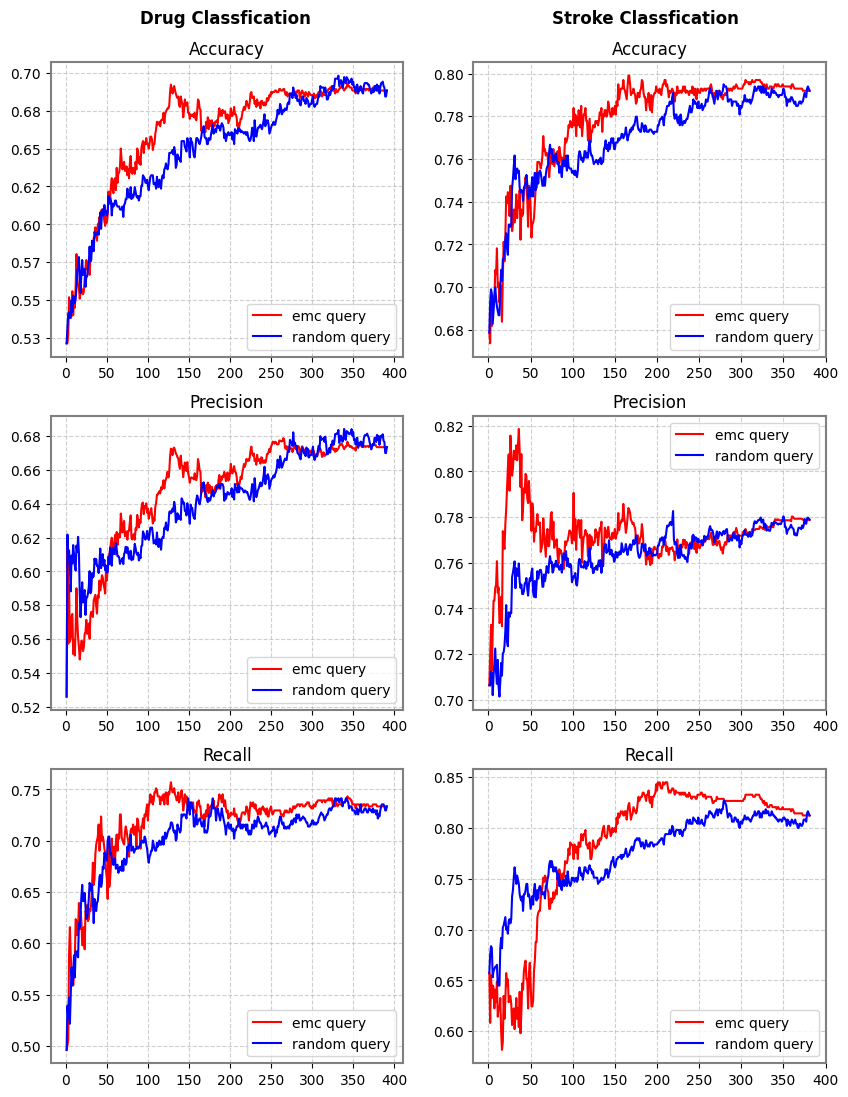

In [54]:
# plot for github
def metric_plotter(ax, x, emc_y, baseline_y, title):
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_xticks(np.arange(0,len(drug_n_sim_accuracy_ls[0])+100,50))
    ax.set_title(title)
    for spine in ax.spines.values():
        spine.set_color('grey')
        spine.set_linewidth(1.5)
    ax.plot(x,emc_y, color='red', label='emc query')
    ax.plot(x,baseline_y, color='blue',label='random query')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

fig, axes = plt.subplots(3,2, figsize=(10,13))
fig.text(0.3, 0.91, "Drug Classfication", ha='center', fontsize=12,fontweight='bold')
fig.text(0.72, 0.91, "Stroke Classfication", ha='center', fontsize=12,fontweight='bold')

drug_n_updates =  len(drug_n_sim_accuracy_ls[0])
drug_x = np.linspace(1, drug_n_updates, drug_n_updates)
stroke_n_updates =  len(stroke_n_sim_accuracy_ls[0])
stroke_x = np.linspace(1, stroke_n_updates, stroke_n_updates)

# plot
metric_plotter(axes[0,0], drug_x, drug_emc_avg_acc_arr, drug_rand_avg_acc_arr, title="Accuracy")
metric_plotter(axes[1,0], drug_x, drug_emc_avg_prec_arr, drug_rand_avg_prec_arr, title="Precision")
metric_plotter(axes[2,0], drug_x, drug_emc_avg_recall_arr, drug_rand_avg_recall_arr, title="Recall")

metric_plotter(axes[0,1], stroke_x, stroke_emc_avg_acc_arr, stroke_rand_avg_acc_arr, title="Accuracy")
metric_plotter(axes[1,1], stroke_x, stroke_emc_avg_prec_arr, stroke_rand_avg_prec_arr, title="Precision")
metric_plotter(axes[2,1], stroke_x, stroke_emc_avg_recall_arr, stroke_rand_avg_recall_arr, title="Recall")